In [159]:
#Import all the Libraries for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
#Making the Model
model = Sequential()

In [161]:
#Adding First Layer of Convolution and MaxPooling

model.add(Convolution2D(64, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Adding Second Layer of Convolution and MaxPooling
model.add(Convolution2D(64, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten the processed data
model.add(Flatten())

#Insert the data in ANN
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compilation 
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 21, 21, 64)        1792      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_35 (Dense)             (None, 1)               

In [162]:
#Preprocessing the Training data

#Argument and Rescaling the data

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Importing Training data

training_set = train_datagen.flow_from_directory(
        'G:\[FreeCourseSite.com] Udemy - Machine Learning A-Z™ Hands-On Python & R In Data Science\Machine Learning A-Z New\Part 8 - Deep Learning\Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set',
        target_size=(64, 64),
        batch_size=8,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [163]:
#Preprocessing the Test data

#Rescaling the test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Importing Test data

test_set = test_datagen.flow_from_directory(
        'G:\[FreeCourseSite.com] Udemy - Machine Learning A-Z™ Hands-On Python & R In Data Science\Machine Learning A-Z New\Part 8 - Deep Learning\Section 40 - Convolutional Neural Networks (CNN)/dataset/test_set',
        target_size=(64, 64),
        batch_size=8,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [164]:
#Fitting the Training set on the model

model.fit(
        training_set,
        steps_per_epoch=int(8000/8),
        epochs=50,
        validation_data=test_set,
        validation_steps=int(2000/8))

Epoch 1/50
1000/1000 [==============================] - 51s 51ms/step - loss: 0.6930 - accuracy: 0.5210 - val_loss: 0.6848 - val_accuracy: 0.5615
Epoch 2/50
1000/1000 [==============================] - 46s 46ms/step - loss: 0.6852 - accuracy: 0.5493 - val_loss: 0.6784 - val_accuracy: 0.5650
Epoch 3/50
1000/1000 [==============================] - 47s 47ms/step - loss: 0.6751 - accuracy: 0.5778 - val_loss: 0.6627 - val_accuracy: 0.6020
Epoch 4/50
1000/1000 [==============================] - 47s 47ms/step - loss: 0.6659 - accuracy: 0.5932 - val_loss: 0.6568 - val_accuracy: 0.6135
Epoch 5/50
1000/1000 [==============================] - 46s 46ms/step - loss: 0.6554 - accuracy: 0.6144 - val_loss: 0.6441 - val_accuracy: 0.6390
Epoch 6/50
1000/1000 [==============================] - 46s 46ms/step - loss: 0.6479 - accuracy: 0.6183 - val_loss: 0.6419 - val_accuracy: 0.6305
Epoch 7/50
1000/1000 [==============================] - 46s 46ms/step - loss: 0.6417 - accuracy: 0.6279 - val_loss: 0.6330 -

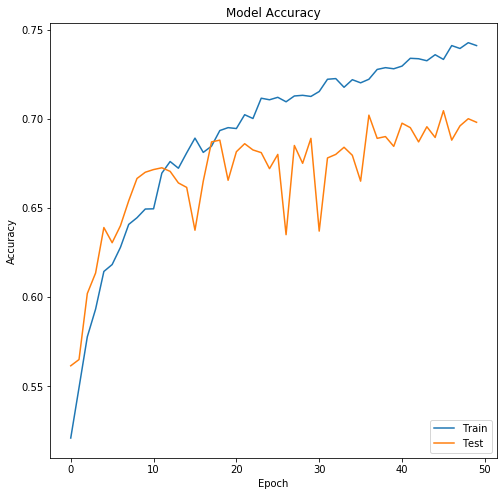

In [165]:
#Accuracy

plt.figure(figsize=(8,8))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

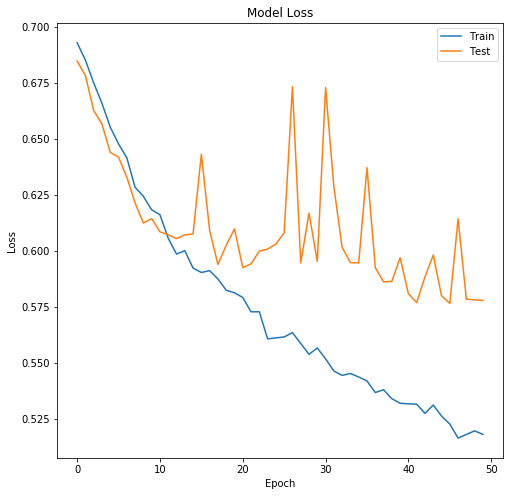

In [167]:
#Loss
plt.figure(figsize=(8,8))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [168]:
#Import all the important Libraries
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

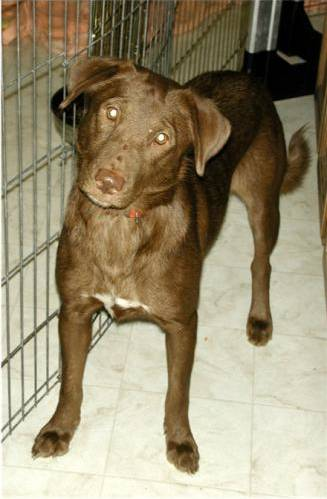Predicting this Image

In [169]:
#Classify the above image based on our trained model

test_image = load_img(r'C:\Users\Priyank\Py_DS_ML_Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\TensorFlow_FILES\CNNs\dataset\training_set\dogs\dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

Prediction: It's a Dog's image.


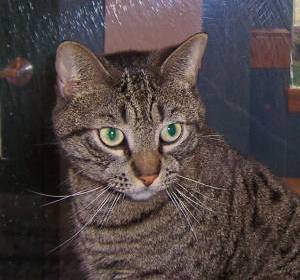

In [170]:
#Classify the above image based on our trained model

test_image = load_img(r'C:\Users\Priyank\Py_DS_ML_Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\TensorFlow_FILES\CNNs\dataset\training_set\cats\cat.8.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

Prediction: It's a Cat's image.
